# Exercice 1

Matrice de rotation de l'objet (Robj):
[[ 0.8660254  0.         0.5        0.       ]
 [ 0.         1.         0.         0.       ]
 [-0.5        0.         0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]
Matrice extrinsèque (transformation monde -> caméra):
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [-0.  0.  1. -4.]
 [ 0.  0.  0.  1.]]
Matrice de projection (P):
[[ 1.50e+02  0.00e+00  3.25e+02 -1.30e+03]
 [ 0.00e+00 -1.50e+02  2.50e+02 -1.00e+03]
 [ 0.00e+00  0.00e+00  1.00e+00 -4.00e+00]]
Coordonnées projetées (Ximg):
[[ -976.1379332   -910.94555434  -910.94555434  -976.1379332
   -976.1379332  -1689.05444566 -1623.8620668  -1623.8620668
  -1689.05444566 -1689.05444566 -1623.8620668   -910.94555434
   -910.94555434 -1623.8620668  -1689.05444566  -976.1379332 ]
 [-1058.49364905  -808.49364905  -508.49364905  -758.49364905
  -1058.49364905 -1491.50635095 -1241.50635095  -941.50635095
  -1191.50635095 -1491.50635095 -1241.50635095  -808.49364905
   -508.49364905  -94

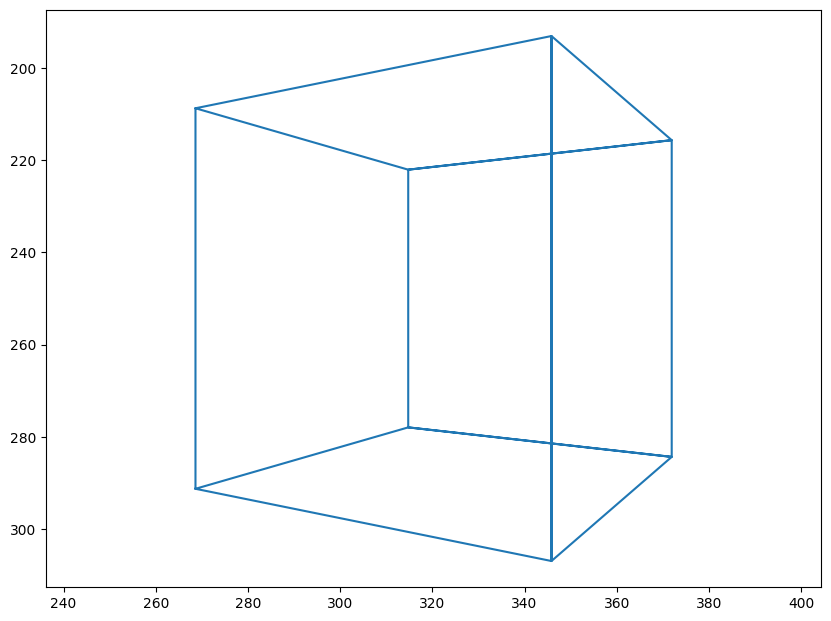

In [9]:
# Importation des bibliothèques nécessaires
import numpy as np
from matplotlib import pyplot as plt
from math import cos, sin, pi

# Paramètres de la caméra
f = 1.5       # Distance focale (focale de la caméra)
px = 325      # Coordonnée x du point principal (centre de l'image en pixels)
py = 250      # Coordonnée y du point principal
m = 100       # Facteur d'échelle (conversion des unités du monde réel en pixels)

# Coordonnées des sommets d'un cube dans le référentiel du monde
x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]

# Construction de la matrice homogène du cube
# Les coordonnées homogènes ajoutent une quatrième dimension pour simplifier les transformations
Xcube = np.array([x, y, z, [1]*16])

# Définition de la rotation de l'objet (cube) autour de l'axe y
alpha = pi/6  # Angle de rotation en radians (30°)
Robj = np.array([[ cos(alpha), 0, sin(alpha), 0],
                 [          0, 1,          0, 0],
                 [-sin(alpha), 0, cos(alpha), 0],
                 [          0, 0,          0, 1]])
print("Matrice de rotation de l'objet (Robj):")
print(Robj)

# Définition de la rotation de la caméra autour de l'axe y
theta = 0  # Pas de rotation pour la caméra dans cet exemple
R = np.array([[ cos(theta), 0, sin(theta)],
              [          0, 1,          0],
              [-sin(theta), 0, cos(theta)]])

# Position de la caméra dans le référentiel monde
C = np.array([[0],    # Position x
              [0],    # Position y
              [-4]])  # Position z (4 unités derrière le centre du cube)

# Construction de la matrice extrinsèque (transformation du monde vers la caméra)
extrinsic = np.hstack((np.vstack((R, [0, 0, 0])), np.vstack((R @ C, [1]))))
print("Matrice extrinsèque (transformation monde -> caméra):")
print(extrinsic)

# Construction de la matrice intrinsèque (transformation caméra -> image)
intrinsic = np.array([[m*f,    0, px, 0],
                      [  0, -m*f, py, 0],
                      [  0,    0,  1, 0]])

# Matrice de projection complète (combinaison intrinsèque et extrinsèque)
P = intrinsic @ extrinsic
print("Matrice de projection (P):")
print(P)

# Projection des coordonnées du cube dans l'image
Ximg = P @ Robj @ Xcube
print("Coordonnées projetées (Ximg):")
print(Ximg)

# Conversion des coordonnées homogènes en coordonnées 2D
xi = Ximg[0, :] / Ximg[2, :]  # Coordonnée x de l'image (normalisée)
yi = Ximg[1, :] / Ximg[2, :]  # Coordonnée y de l'image (normalisée)

# Paramètres d'affichage
factor = 2.5  # Facteur de conversion pouce -> cm pour les dimensions de la figure
plt.figure(figsize=(4*factor, 3*factor))  # Dimensions de la figure en pouces
plt.axis([0, 640, 480, 0])  # Définition de la zone visible (axes inversés pour correspondre à une image)
plt.plot(xi, yi)  # Tracé des projections des points du cube dans l'image
plt.axis('equal')  # Maintenir l'échelle égale entre les axes x et y
plt.show()
